Mounted at /content/drive
Python 3.10.12
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7a0bb647db40>, {'None': [3.152805164221887, -99.90999994503757, -99.909999980088, -99.90988851904073], "[7, 0, '1111']": [-7.718328507824067, -99.9099911931132, 2.6229077237703615, 3.2427313871044285], "[6, 0, '1110']": [2.1046366996784864, -99.90999807958343, 1.4855708935386416, 3.3872766415484006], "[5, 0, '1110']": [-6.608319696416521, -99.90988851904073, 1.8461953486148297, 3.6158839807574403], "[6, 0, '1100']": [0.5600395072696588, -78.10196892905141, 0.9240945178933658, 2.761884060590165], "[6, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[7, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[5, 1, '0011']": [0.44241097874566504, 2.562612566375923, 0.6371082562670957, 1.729990755938279], "[6, 1, '0001']": [0.1, 1.7829549992689093, -0.30208100000000004, 0.1], "[6, 1, '0011']": [-0.25516566418650516, 2.2387384311941783, -2.5292883147592655, -9.420778663769871], "[5, -1, '1000']": [0.1, 0.1, 0.1

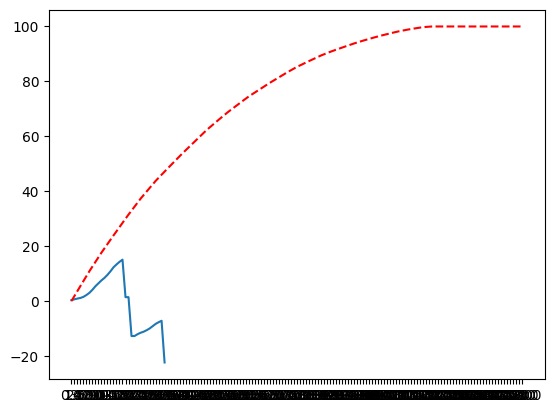

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning/')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
#!pip install pybullet
#!pip install gymnasium
#!pip install urdfpy

import os

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/'
directory_files = os.listdir(directory_path)


#print(filename)


########################

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import time
import csv

def export_to_csv(data, filename):
    with open(filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        csv_writer.writerow(['Key', 'Value'])

        # Write data
        for key, value in data.items():
            csv_writer.writerow([key, value])



start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory
import pandas as pd
from ast import literal_eval
def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1
global ij
ij=0





reward=0


i=0
#df = pd.Dataframe()


class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
        PREVIOUSQ=import_from_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/learning/RP3_0.3981_0.9_0.3162_500.csv')
        self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

        ##################################################
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        #print(state)
        xx=7
        yy=0


        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            action = np.random.choice(self.actions)
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    #global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]





    for episode in range(number_of_steps):
        state = env.reset()



        #global number_of_steps######################################
        n=160
        local_reward_plot=[]
        trigger_25=1
        trigger_50=1
        trigger_75=1
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            if reward_sum>=25*0.7063873 and trigger_25==1:
              print("25% covered after ", trial, "Trials")
              trigger_25=0

            if reward_sum>=50*0.7063873 and trigger_50==1:
              print("50% covered after ", trial, "Trials")
              trigger_50=0

            if reward_sum>=75*0.7063873 and trigger_75==1:
              print("75% covered after ", trial, "Trials")
              trigger_75=0

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/0.7063873, "%")

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break
global g
#g.show()


f=plt.figure(1)
plt.plot(local_reward_plot/0.7063873)
#plt.plot(np.linspace(1, n+1, n), local_reward_plot/0.6273)



#plt.title(filename)

data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')

plt.plot(data.iloc[0], 'r--')

#f.show()
f.show()

data_array = np.vstack((local_reward_plot*100/0.70638731))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/learning/rewards/n500.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)

